In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle as cp
import sys
import os
from plotting_performance_vs_metric import get_performance_metric, average_results_array, median_results_array
from plotting_performance_vs_metric import get_rff_memory, get_nystrom_memory
import math
from copy import deepcopy

### the data folder is called full tuning run but it is the full run after tuning round

In [9]:
def plot_full_run(n_rff_feat, n_nystrom_feat, general_folder, folder_pattern, seeds=[1,], 
                  rff_mem_func=None, nystrom_mem_func=None, min_metric_best=True, 
                  metric_file_name="eval_metric.txt", do_median=False):
    metric_list_rff = []
    for seed in seeds:
        metric_list = []
        for n_feat in n_rff_feat:
            subfolder = deepcopy(folder_pattern)
            subfolder = subfolder.replace("type_unk", "type_rff")
            subfolder = subfolder.replace("n_fp_feat_unk", "n_fp_feat_" + str(n_feat) )
            subfolder = subfolder.replace("seed_unk", "seed_" + str(seed) )
            folder_name = general_folder + "/" + subfolder
            file_name = metric_file_name
            metric = get_performance_metric(folder_name, file_name, min_best=min_metric_best)
            metric_list.append(metric)
        metric_list_rff.append(np.array(deepcopy(metric_list) ) )
    if do_median:
        metric_list_rff = median_results_array(metric_list_rff)
    else:
        metric_list_rff = average_results_array(metric_list_rff)
    memory_list_rff = np.array( [rff_mem_func(n_feat) for n_feat in n_rff_feat] )

    
    metric_list_nystrom = []
    for seed in seeds:
        metric_list = []
        for n_feat in n_nystrom_feat:
            subfolder = deepcopy(folder_pattern)
            subfolder = subfolder.replace("type_unk", "type_nystrom")
            subfolder = subfolder.replace("n_fp_feat_unk", "n_fp_feat_" + str(n_feat) )
            subfolder = subfolder.replace("seed_unk", "seed_" + str(seed) )
            folder_name = general_folder + "/" + subfolder
            file_name = metric_file_name
            metric = get_performance_metric(folder_name, file_name, min_best=min_metric_best)
            metric_list.append(metric)
        metric_list_nystrom.append(np.array(deepcopy(metric_list) ) )
    if do_median:
        metric_list_nystrom = median_results_array(metric_list_nystrom)
    else:
        metric_list_nystrom = average_results_array(metric_list_nystrom)
    memory_list_nystrom = np.array( [nystrom_mem_func(n_feat) for n_feat in n_nystrom_feat] )
    
    plt.figure()
    plt.plot(n_rff_feat, np.sqrt(np.array(metric_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(n_nystrom_feat, np.sqrt(np.array(metric_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("metric vs n feat")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(memory_list_rff, np.sqrt(np.array(metric_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(memory_list_nystrom, np.sqrt(np.array(metric_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("metric vs n memory")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

census heldout sqrt l2


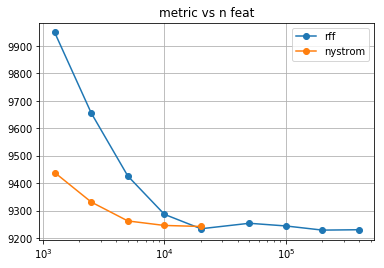

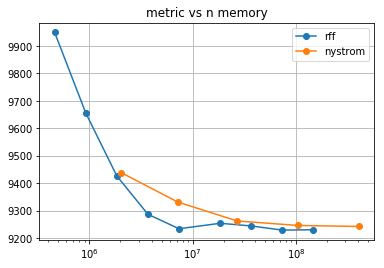

In [16]:
print "census heldout sqrt l2"
m = 250
r = 119
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "census_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_0.5_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True)

yearpred heldout sqrt l2


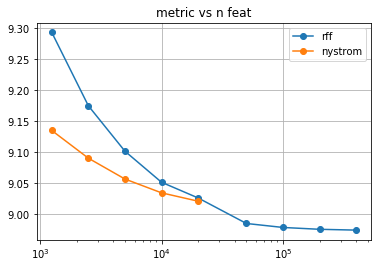

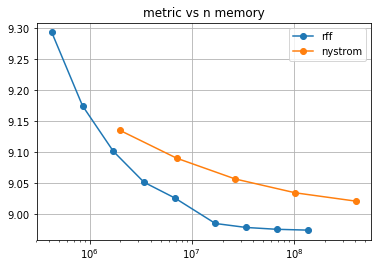

In [17]:
print "yearpred heldout sqrt l2"
m = 250
r = 90
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "yearpred_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_0.5_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True)

covtype heldout accuray


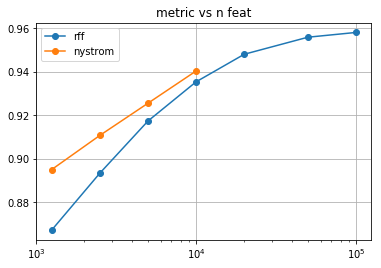

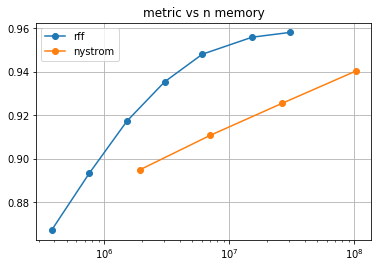

In [19]:
print "covtype heldout accuray"
m = 250
r = 54
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "covtype_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_50.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000] #, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000]#, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3,], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=False)

covtype heldout cross entropy


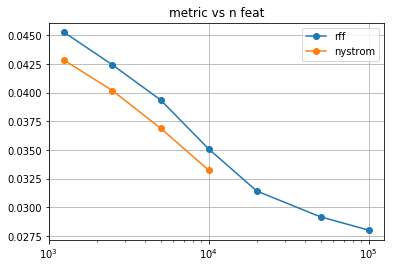

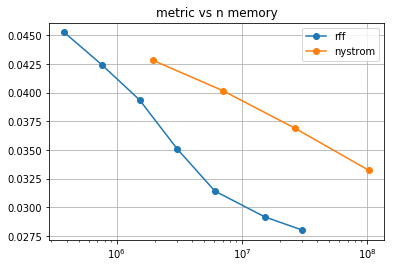

In [20]:
print "covtype heldout cross entropy"
m = 250
r = 54
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "covtype_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_50.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000] #, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000]#, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3,], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True, metric_file_name="monitor_signal.txt")

timit heldout accuracy


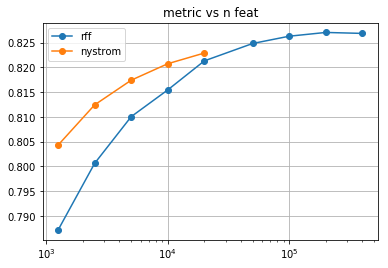

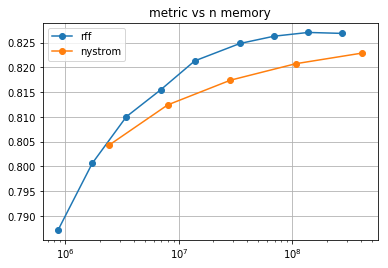

In [21]:
print "timit heldout accuracy"
m = 250
r = 440
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "timit_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_100.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=False)

timit heldout cross entropy


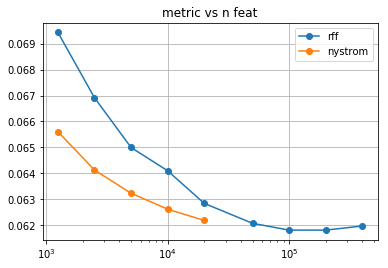

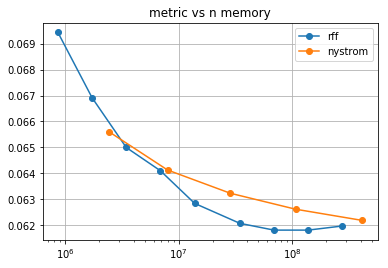

In [22]:
print "timit heldout cross entropy"
m = 250
r = 440
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
subfolder_pattern = "timit_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_100.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True, metric_file_name="monitor_signal.txt")